In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

%matplotlib inline
plt.style.use('ggplot')

In [2]:
smarket = pd.read_csv('./Downloads/Smarket.csv', index_col=0)
smarket_gummies = pd.get_dummies(smarket, drop_first=True)
smarket_gummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          1250 non-null   int64  
 1   Lag1          1250 non-null   float64
 2   Lag2          1250 non-null   float64
 3   Lag3          1250 non-null   float64
 4   Lag4          1250 non-null   float64
 5   Lag5          1250 non-null   float64
 6   Volume        1250 non-null   float64
 7   Today         1250 non-null   float64
 8   Direction_Up  1250 non-null   uint8  
dtypes: float64(7), int64(1), uint8(1)
memory usage: 89.1 KB


In [3]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [5]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


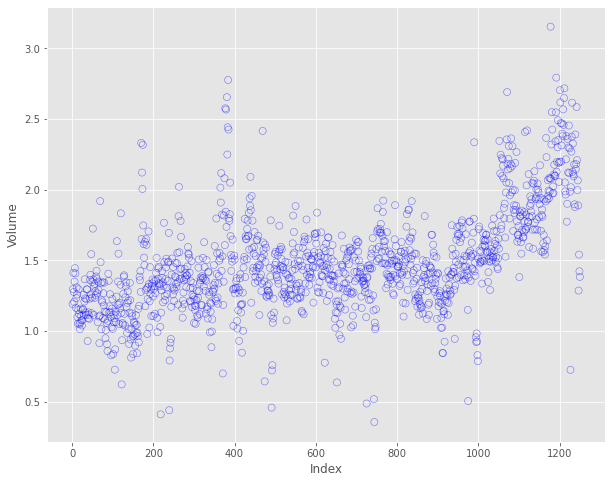

In [6]:
plt.figure(figsize=(10, 8))

sns.scatterplot(y=smarket['Volume'], x=smarket.index, s=50, facecolor='none', edgecolor='blue', alpha=.5)

plt.xlabel('Index', fontsize=12)

plt.show()

# Logistic Regression

In [7]:
est = smf.logit('Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', smarket_gummies).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Tue, 07 Sep 2021   Pseudo R-squ.:                0.002074
Time:                        10:55:51   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [8]:
est.params

Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [9]:
pred = est.predict()

In [10]:
def conf_mat(true, pred):
    cm = confusion_matrix(true, pred > .5).T

    ind = pd.MultiIndex.from_product([['Pred'], ['Down', 'Up']])
    col = pd.MultiIndex.from_product([['True'], ['Down', 'Up']])

    return pd.DataFrame(cm, index=ind, columns=col)

In [11]:
print(conf_mat(smarket_gummies['Direction_Up'], pred))

          True     
          Down   Up
Pred Down  145  141
     Up    457  507


In [12]:
print(classification_report(smarket_gummies['Direction_Up'], pred > .5))

              precision    recall  f1-score   support

           0       0.51      0.24      0.33       602
           1       0.53      0.78      0.63       648

    accuracy                           0.52      1250
   macro avg       0.52      0.51      0.48      1250
weighted avg       0.52      0.52      0.48      1250



In [13]:
accuracy_score(smarket_gummies['Direction_Up'], pred > .5)

0.5216

In [14]:
tn, fp, fn, tp = confusion_matrix(smarket_gummies['Direction_Up'], pred > .5).ravel()
print('Accuracy: ', (tp+tn)/(tn+fp+fn+tp))

Accuracy:  0.5216


In [15]:
((pred > .5) == smarket_gummies['Direction_Up']).mean()

0.5216

In [16]:
cond = smarket_gummies['Year'] < 2005

train, test = smarket_gummies[cond], smarket_gummies[~cond]

est = smf.logit('Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', train).fit()
pred = est.predict(test)

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


In [17]:
print(conf_mat(test['Direction_Up'], pred))

          True    
          Down  Up
Pred Down   77  97
     Up     34  44


In [18]:
print('Test error rate: ', 1-accuracy_score(test['Direction_Up'], pred > .5))

Test error rate:  0.5198412698412698


In [19]:
est = smf.logit('Direction_Up ~ Lag1 + Lag2', train).fit()
pred = est.predict(test)

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


In [20]:
print(conf_mat(test['Direction_Up'], pred))

          True     
          Down   Up
Pred Down   35   35
     Up     76  106


In [21]:
accuracy_score(test['Direction_Up'], pred > .5)

0.5595238095238095

In [22]:
precision_score(test['Direction_Up'], pred > .5)

0.5824175824175825

In [23]:
data = {'Lag1': [1.2, 1.5], 'Lag2': [1.1, -.8]}
est.predict(pd.DataFrame(data))

0    0.479146
1    0.496094
dtype: float64

# Linear Discriminant Analysis

In [24]:
train = smarket['Year'] < 2005

train, test = smarket[train], smarket[~train]

lda = LinearDiscriminantAnalysis()
lda.fit(train[['Lag1', 'Lag2']], train['Direction'])

lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [25]:
print('Prior probabilities of groups: \n', pd.DataFrame(
    np.expand_dims(lda.priors_, 0), columns=['Down', 'Up']), '\n')
print('Group means: \n', pd.DataFrame(lda.means_, index=[
      'Down', 'Up'], columns=['Lag1', 'Lag2']), '\n')
print('Coefficients of linear discriminants: \n', pd.DataFrame(
    lda.scalings_, index=['Lag1', 'Lag2'], columns=['LD1']), '\n')

Prior probabilities of groups: 
        Down        Up
0  0.491984  0.508016 

Group means: 
           Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325 

Coefficients of linear discriminants: 
            LD1
Lag1 -0.642019
Lag2 -0.513529 



In [26]:
pred = lda.predict(test[['Lag1', 'Lag2']])

cm = confusion_matrix(test['Direction'], pred).T

ind = pd.MultiIndex.from_product([['Pred'], ['Down', 'Up']])
col = pd.MultiIndex.from_product([['True'], ['Down', 'Up']])

pd.DataFrame(cm, index=ind, columns=col)

True     
          Down   Up
Pred Down   35   35
     Up     76  106

In [27]:
accuracy_score(test['Direction'], pred)

0.5595238095238095

In [28]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [29]:
sum(lda.predict_proba(test[['Lag1', 'Lag2']])[:, 0] >= .5)

70

In [30]:
sum(lda.predict_proba(test[['Lag1', 'Lag2']])[:, 0] < .5)

182

In [31]:
lda.predict_proba(test[['Lag1', 'Lag2']])[:20, 0]

array([0.49017925, 0.4792185 , 0.46681848, 0.47400107, 0.49278766,
       0.49385615, 0.49510156, 0.4872861 , 0.49070135, 0.48440262,
       0.49069628, 0.51199885, 0.48951523, 0.47067612, 0.47445929,
       0.47995834, 0.49357753, 0.50308938, 0.49788061, 0.48863309])

In [32]:
lda.predict(test[['Lag1', 'Lag2']])[:20]

array(['Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up'],
      dtype='<U4')

In [33]:
sum(lda.predict_proba(test[['Lag1', 'Lag2']])[:, 0] >= .9)

0

# Quadratic Discriminant Analysis</font>

In [34]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(train[['Lag1', 'Lag2']], train['Direction'])

QuadraticDiscriminantAnalysis()

In [35]:
print('Prior probabilities of groups: \n', pd.DataFrame(
    np.expand_dims(qda.priors_, 0), columns=['Down', 'Up']), '\n')
print('Group means: \n', pd.DataFrame(qda.means_, index=[
      'Down', 'Up'], columns=['Lag1', 'Lag2']), '\n')

Prior probabilities of groups: 
        Down        Up
0  0.491984  0.508016 

Group means: 
           Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325 



In [36]:
pred = qda.predict(test[['Lag1', 'Lag2']])

cm = confusion_matrix(test['Direction'], pred).T

ind = pd.MultiIndex.from_product([['Pred'], ['Down', 'Up']])
col = pd.MultiIndex.from_product([['True'], ['Down', 'Up']])

pd.DataFrame(cm, index=ind, columns=col)

True     
          Down   Up
Pred Down   30   20
     Up     81  121

In [37]:
accuracy_score(test['Direction'], pred)

0.5992063492063492

# K-Nearest Neighbors

In [38]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(train[['Lag1', 'Lag2']], train['Direction'])

KNeighborsClassifier(n_neighbors=1)

In [39]:
pred = knn1.predict(test[['Lag1', 'Lag2']])

cm = confusion_matrix(test['Direction'], pred).T

ind = pd.MultiIndex.from_product([['Pred'], ['Down', 'Up']])
col = pd.MultiIndex.from_product([['True'], ['Down', 'Up']])

pd.DataFrame(cm, index=ind, columns=col)

True    
          Down  Up
Pred Down   43  58
     Up     68  83

In [40]:
accuracy_score(test['Direction'], pred)

0.5

# Classification Caravan dataset with Logistic regression and KNN

In [41]:
caravan = pd.read_csv('./Downloads/Caravan.csv', index_col=0)
caravan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 1 to 5822
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOSTYPE   5822 non-null   int64 
 1   MAANTHUI  5822 non-null   int64 
 2   MGEMOMV   5822 non-null   int64 
 3   MGEMLEEF  5822 non-null   int64 
 4   MOSHOOFD  5822 non-null   int64 
 5   MGODRK    5822 non-null   int64 
 6   MGODPR    5822 non-null   int64 
 7   MGODOV    5822 non-null   int64 
 8   MGODGE    5822 non-null   int64 
 9   MRELGE    5822 non-null   int64 
 10  MRELSA    5822 non-null   int64 
 11  MRELOV    5822 non-null   int64 
 12  MFALLEEN  5822 non-null   int64 
 13  MFGEKIND  5822 non-null   int64 
 14  MFWEKIND  5822 non-null   int64 
 15  MOPLHOOG  5822 non-null   int64 
 16  MOPLMIDD  5822 non-null   int64 
 17  MOPLLAAG  5822 non-null   int64 
 18  MBERHOOG  5822 non-null   int64 
 19  MBERZELF  5822 non-null   int64 
 20  MBERBOER  5822 non-null   int64 
 21  MBERMIDD  5822

In [42]:
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [43]:
caravan['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [46]:
caravan_scaled = pd.DataFrame(scale(caravan.drop('Purchase', axis=1)), columns=caravan.columns[:-1])
caravan_scaled.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.680906,-0.27258,0.406697,-1.216964,0.779405,-0.694311,0.217444,-0.068711,-0.161816,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
1,0.992297,-0.27258,-0.859500,-1.216964,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
2,0.992297,-0.27258,-0.859500,-1.216964,0.779405,-0.694311,-0.365410,0.914172,0.464159,-1.667319,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
3,-1.187437,-0.27258,0.406697,0.010755,-0.970980,1.299414,-0.948264,0.914172,0.464159,-0.619824,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
4,1.225840,-0.27258,1.672893,-1.216964,1.479559,0.302552,-0.365410,-0.068711,0.464159,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816


In [47]:
X_train, X_test = caravan_scaled.iloc[1000:, :], caravan_scaled.iloc[:1000, :]
y_train, y_test = caravan['Purchase'][1000:], caravan['Purchase'][:1000]

In [61]:
def conf_table(pred):
    cm = confusion_matrix(y_test, pred).T

    ind = pd.MultiIndex.from_product([['Pred'], ['No', 'Yes']])
    col = pd.MultiIndex.from_product([['True'], ['No', 'Yes']])

    return pd.DataFrame(cm, index=ind, columns=col)

In [62]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [63]:
pred = knn1.predict(X_test)

conf_table(pred)

True    
           No Yes
Pred No   873  50
     Yes   68   9

In [64]:
print('Test error rate: ', 1-accuracy_score(y_test, pred))

Test error rate:  0.118


In [65]:
y_test.value_counts()['Yes']/1000

0.059

In [66]:
precision_score(y_test, pred, average=None)[1]

0.11688311688311688

In [67]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
pred = knn3.predict(X_test)

conf_table(pred)

True    
           No Yes
Pred No   921  54
     Yes   20   5

In [70]:
precision_score(y_test, pred, average=None)[1]

0.2

In [71]:
knn5 = KNeighborsClassifier()
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
pred = knn5.predict(X_test)

conf_table(pred)

True    
           No Yes
Pred No   930  55
     Yes   11   4

In [73]:
precision_score(y_test, pred, average=None)[1]

0.26666666666666666

In [76]:
log_reg = LogisticRegression(solver='newton-cg')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [77]:
pred = log_reg.predict(X_test)

conf_table(pred)

True    
           No Yes
Pred No   934  59
     Yes    7   0

In [78]:
precision_score(y_test, pred, average=None)[1]

0.0

In [79]:
pred = np.where(log_reg.predict_proba(X_test)[:, 1] > .25, 'Yes', 'No')

conf_table(pred)

True    
           No Yes
Pred No   917  48
     Yes   24  11

In [80]:
precision_score(y_test, pred, average=None)[1]

0.3142857142857143